In [1]:
import mph
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from boids_simulation import Flock, FlockSquare

In [4]:
flock = FlockSquare(10, 500, 250, 1, 0, 0)

In [5]:
for _ in range(1000):
    flock.run()

In [6]:
trajectories = np.asarray([boid.history[:10] for boid in flock.boids])

In [7]:
trajectories

array([[[442.4166116 , 138.70257961],
        [440.67773847, 140.43326988],
        [438.93886535, 142.16396014],
        [437.19999222, 143.8946504 ],
        [437.42762867, 158.89292302],
        [437.65526512, 173.89119565],
        [437.88290157, 188.88946827],
        [438.11053802, 203.88774089],
        [438.33817447, 218.88601351],
        [438.56581092, 233.88428613]],

       [[237.89687848, 168.8485194 ],
        [236.85147814, 170.17395938],
        [235.8060778 , 171.49939935],
        [234.76067746, 172.82483932],
        [233.71527712, 174.1502793 ],
        [232.66987678, 175.47571927],
        [231.62447644, 176.80115924],
        [230.5790761 , 178.12659922],
        [229.53367576, 179.45203919],
        [228.48827542, 180.77747916]],

       [[124.87265008,  25.72083461],
        [122.63888597,  27.8410675 ],
        [120.40512186,  29.96130038],
        [118.17135776,  32.08153327],
        [115.93759365,  34.20176616],
        [113.70382954,  36.32199905],
        

In [8]:
landscape = mph.compute_spatiotemporal_landscapes_sparse(trajectories, 200, 1)

Starting to compute boundary matrices...
Finished computing boundary matrices.
Finished computing boundary matrices.
Starting to presentation degree by degree...
Nonminimal presentation of size 0
Starting to compute minimal generating set for columns of size: 0
Starting to compute persistence landscape...
Finished computing compressed landscape.


In [9]:
landscape.pairings

[]

In [48]:
def lex_seq(v_max):
    seq = []
    for i in range(v_max[0]):
        for j in range(v_max[1]):
            if len(v_max) == 2:
                seq.append([i, j])
            else:
                for k in range(v_max[2]):
                    seq.append([i, j, k])
    return seq

In [11]:
l_values = [landscape.eval(g, 1) for g in lex_seq([10, 10, 10])]

In [12]:
l_values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [64]:
parameter_values = [[g/50.0, 0.005, 0.005] for g in range(50)]#lex_seq([10, 10])]
c = [i for i in range(len(parameter_values))]
l_vectors = []

for index, values in enumerate(parameter_values):
    print("Index: {}".format(index))
    flock = FlockSquare(20, 500, 250, values[0], values[1], values[2])
    
    trajectories = [[] for boid in flock.boids]
    for i in range(100):
        flock.run()
        if i%4 == 0:
            for j in range(len(flock.boids)):
                trajectories[j].append([flock.boids[j].x, flock.boids[j].y])
    landscape = mph.compute_spatiotemporal_landscapes_sparse(trajectories, 100, 1)
    l_values = [landscape.eval(g, 1) for g in lex_seq([50, 25, 25])]
    l_vectors.append(l_values)

Index: 0
Starting to compute boundary matrices...
Finished computing boundary matrices.
Finished computing boundary matrices.
Starting to presentation degree by degree...
Nonminimal presentation of size 59508
Starting to compute minimal generating set for columns of size: 59508
Starting to compute persistence landscape...
Finished computing compressed landscape.
Index: 1
Starting to compute boundary matrices...
Finished computing boundary matrices.
Finished computing boundary matrices.
Starting to presentation degree by degree...
Nonminimal presentation of size 5252
Starting to compute minimal generating set for columns of size: 5252
Starting to compute persistence landscape...
Finished computing compressed landscape.
Index: 2
Starting to compute boundary matrices...
Finished computing boundary matrices.
Finished computing boundary matrices.
Starting to presentation degree by degree...
Nonminimal presentation of size 6479
Starting to compute minimal generating set for columns of size: 

In [34]:
from sklearn.decomposition import PCA

In [65]:
X = np.asarray(l_vectors)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

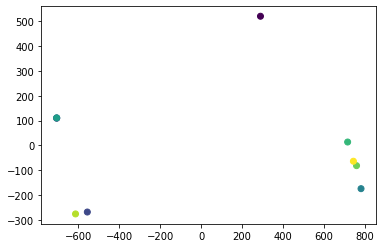

In [66]:
plt.scatter(X_r[:, 0], X_r[:, 1], c=c)

In [17]:
print(pca.singular_values_)

[303.98879877 119.40436074]


[[-18.89693082 129.81660825]
 [445.10237801 212.19869806]
 [227.11584644 326.778901  ]
 [417.81358385 274.83266524]
 [284.6847172  247.54562084]
 [316.06098446 254.47091995]
 [356.98128776 202.97261085]
 [363.232543    32.33379687]
 [458.27405575  99.56370015]
 [ 83.77333987 183.93344171]]
[[-56.03565094 161.75164691]
 [423.88269442 228.48456758]
 [258.21920726 319.87585284]
 [389.70141656 213.71613985]
 [217.75893111 216.99776574]
 [252.83790626 224.81744871]
 [331.87099008 207.15440218]
 [359.79667712  38.3690036 ]
 [469.28908641  91.77007855]
 [158.64298556 188.35341394]]
[[-68.17437107 193.68668556]
 [402.66301082 234.7704371 ]
 [289.32256808 287.97280469]
 [361.58924927 146.59961446]
 [160.44944639 218.54475276]
 [189.61482807 185.16397748]
 [306.7606924  211.33619351]
 [356.36081123  44.40421033]
 [480.30411707  83.97645694]
 [213.76196841 154.15101696]]
[[-55.31309119 225.62172421]
 [381.44332723 219.05630662]
 [320.4259289  231.06975654]
 [333.47708198  79.48308907]
 [108.81659

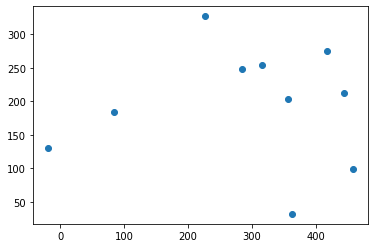

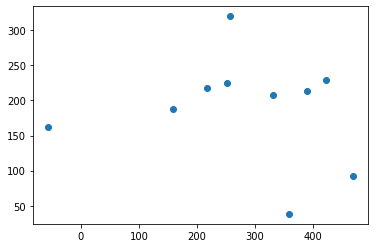

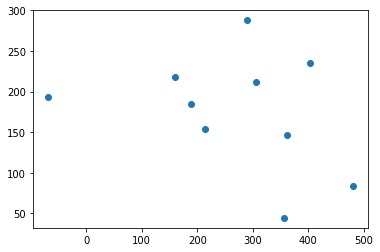

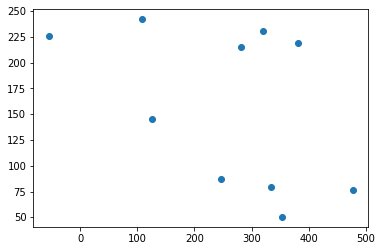

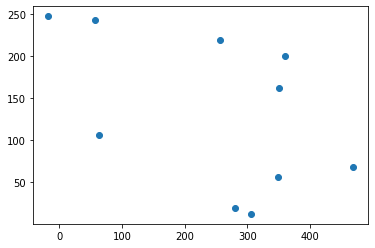

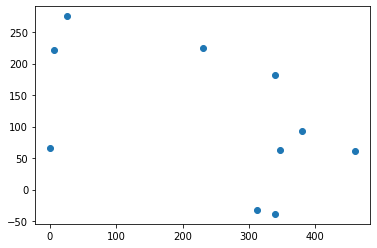

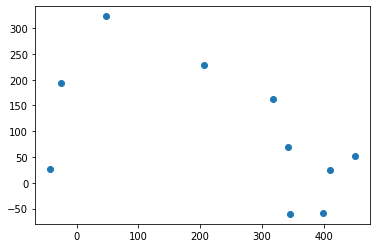

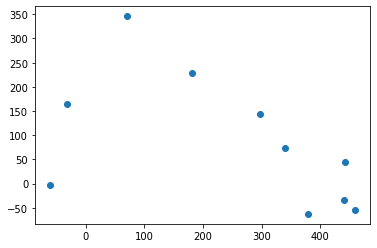

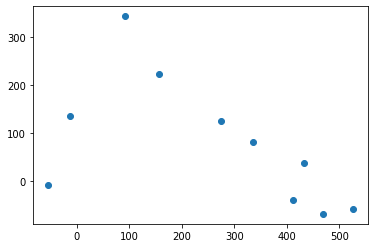

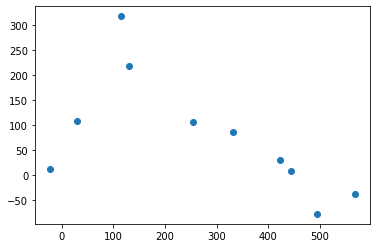

In [7]:
for _ in range(10):
    positions = np.asarray([[b.x, b.y] for b in flock.boids])
    print(positions)
    plt.figure()
    plt.scatter(positions[:, 0], positions[:, 1])
    
    for _ in range(5):
        flock.run()

In [2]:
dir(mph)

['GradedMatrix',
 'List',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'choose_graded_subbasis',
 'compute_spatiotemporal_landscapes_sparse',
 'examples',
 'generate_rivet_output',
 'groebner_bases',
 'mph',
 'np',
 'presentation',
 'presentation_FIrep',
 'presentation_dm',
 'random_FIrep_presentation',
 'random_map_gbs',
 'rivet_benchmark']